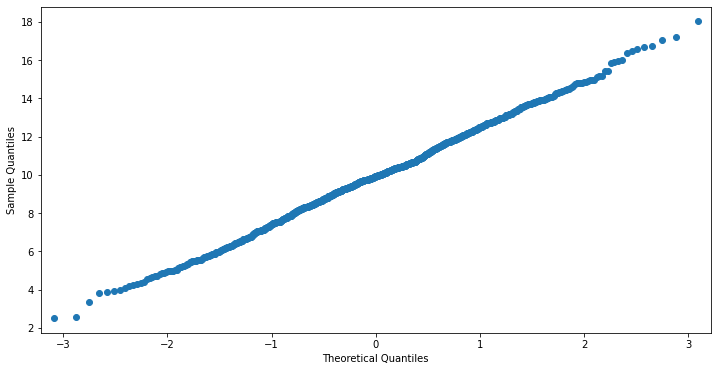

'\nppplot (Probability-Probability plot)\nCompares the sample and theoretical probabilities (percentiles).\n\nqqplot (Quantile-Quantile plot)\nCompares the sample and theoretical quantiles\n\nprobplot (Probability plot)\nSame as a Q-Q plot, however probabilities are shown in the scale of the theoretical distribution (x-axis) \nand the y-axis contains unscaled quantiles of the sample data.\n'

In [313]:
#========================= Q Q plot ====Q================================

import numpy as np
random_normals = [np.random.normal(loc=10, scale=2.5) for i in range(1000)]

#random_normals[:10]
#np.std(random_normals)
#np.mean(random_normals)

import statsmodels.api as sm
from matplotlib import pyplot as plt
# Create QQ plot
sm.qqplot(np.array(random_normals) ) #, line='45'
plt.show()

'''
ppplot (Probability-Probability plot)
Compares the sample and theoretical probabilities (percentiles).

qqplot (Quantile-Quantile plot)
Compares the sample and theoretical quantiles

probplot (Probability plot)
Same as a Q-Q plot, however probabilities are shown in the scale of the theoretical distribution (x-axis) 
and the y-axis contains unscaled quantiles of the sample data.
'''


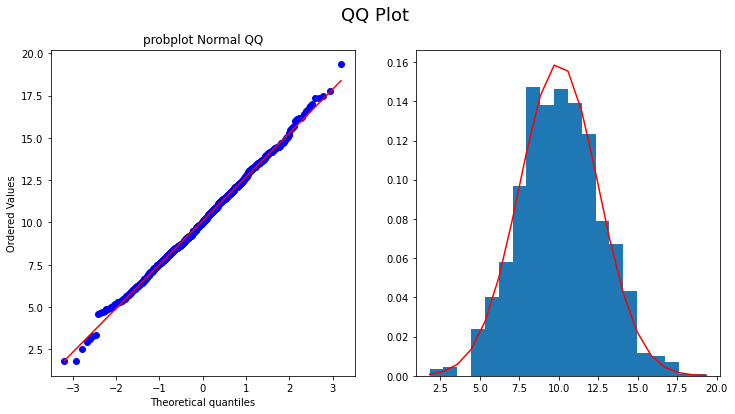

In [187]:
#====================== Q Q plot with probplot ====================================
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

# plt.rcParams - run configuration parametrs that changes parameteres for all next plots as well 
plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 2.5
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)
#sequence[:10]

fig, (ax1, ax2 ) = plt.subplots(1, 2)   # fig, axes = plt.subplots(nrows = 1, ncols = 2) #plt.close()
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("probplot Normal QQ")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 20, density=True) # False will show count insted of %
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')


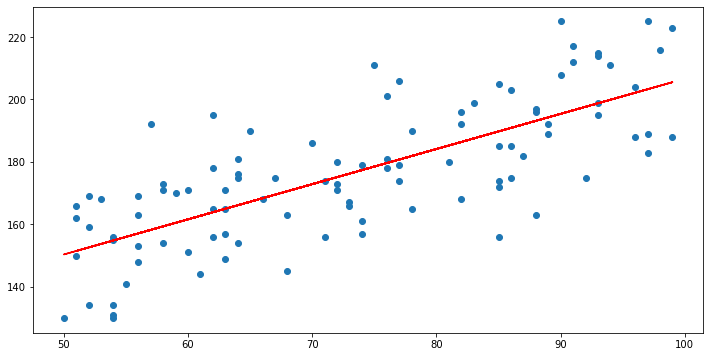

b0 = 94.01 and b1 = 1.13


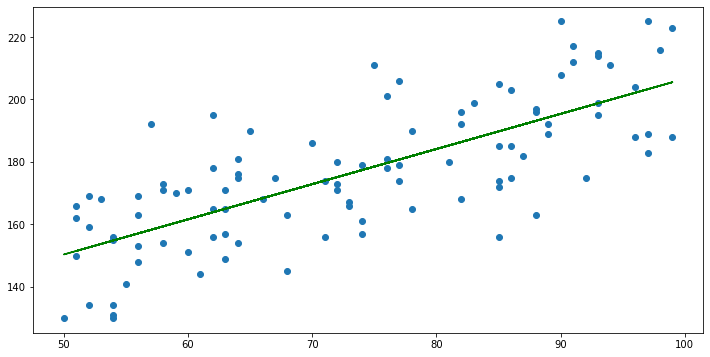

b0_ = 94.01 and b1_ = 1.13
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.49e-19
Time:                        18:16:01   Log-Likelihood:                -411.98
No. Observations:                 100   AIC:                             828.0
Df Residuals:                      98   BIC:                             833.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.0097    

In [89]:
# =================== Liner Regression ===========================
# e.g. - 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

N = 100
x = np.array([np.random.randint(50,100) for i in range(N)])
y = np.array([i+np.random.randint(80,120)-np.random.randint(-20,20) for i in x])
plt.scatter(x, y)

# 1. Find coef.with method polyfit
b1, b0 = np.polyfit(x, y, 1)  #  b1 - slope , b0 - intercept
plt.plot(x, b0 + b1*x, color='red')
plt.show()
print(f'b0 = {b0:.2f} and b1 = {b1:.2f}')

# 2. Find coef.with raw formulas  - the same rezult
sX = sum(x)
sY = sum(y)
sXY = sum([a*b for (a,b) in zip(x,y)])
sX2 = sum([a**2 for a in x])
b1_ = (N*sXY - sX*sY)/(N*sX2 -sX*sX)
b0_ = (sY - b1_*sX)/N

plt.scatter(x, y)
plt.plot(x, b0_ + b1_*x, color='green')
plt.show()
print(f'b0_ = {b0_:.2f} and b1_ = {b1_:.2f}')

#3. Find coef with OLS from statsmodels.api
import statsmodels.api as sm
print(sm.OLS(y, sm.add_constant(x)).fit().summary()) 


#4. Find coef with OLS from statsmodels.formula.api
from statsmodels.formula.api import ols
d = {'X':x,'Y':y}
df = pd.DataFrame(d)
model = ols('y ~ x', data = df).fit()   
print(model.summary())
#All result are the same




In [139]:
d = {'X':x,'Y':y}
df = pd.DataFrame(d)
print(df.head())
'''
df2 = pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis = 1)
print(df2.head())

df3 = pd.concat([pd.Series(x),pd.Series(y)],axis = 1)
print(df3.head())
'''

    X    Y
0  64  175
1  63  157
2  76  201
3  72  180
4  51  166


'\ndf2 = pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis = 1)\nprint(df2.head())\n\ndf3 = pd.concat([pd.Series(x),pd.Series(y)],axis = 1)\nprint(df3.head())\n'

eval_env: 1


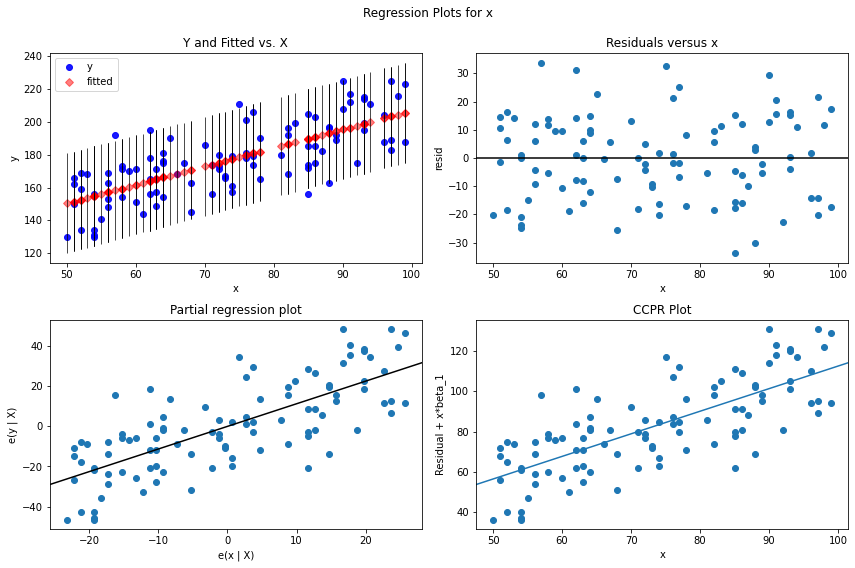

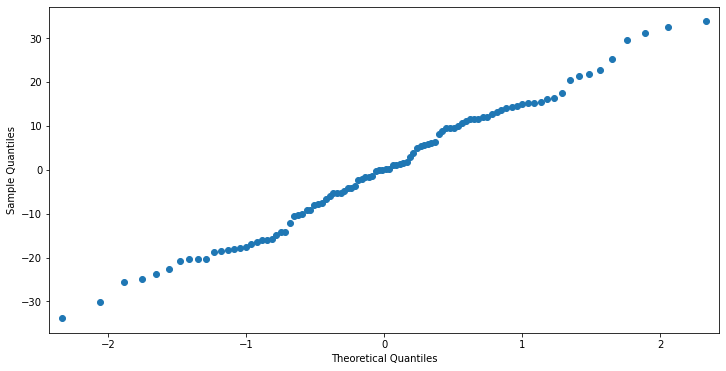

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


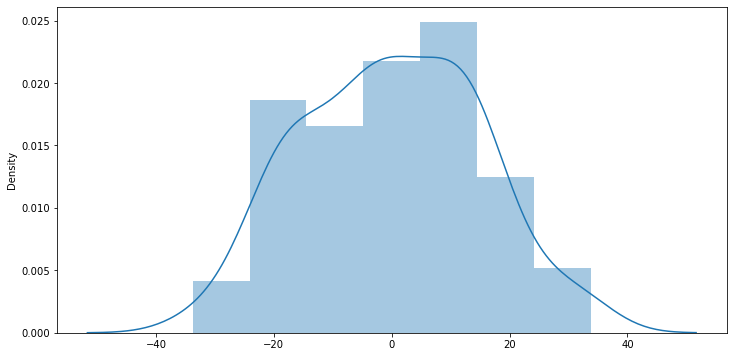

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     120.9
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           8.49e-19
Time:                        18:13:23   Log-Likelihood:                -411.98
No. Observations:                 100   AIC:                             828.0
Df Residuals:                      98   BIC:                             833.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0097      7.659     12.275      0.0

,VIF,variable
0,25.917782,Intercept
1,1.000000,x


In [206]:
# =================== Check condition for using regression model ======================
# https://www.codecamp.ru/blog/linear-regression-python/

# ========== 1.1 существует линейная связь между переменными-предикторами и переменной-откликом.
# =========и 1.2 Residuals Plot - гомогенность/гомоскедостичность остатков ( отсутствие гетероскедостичности остатков -разного разброс остатков)

##### это же требование можно назвать Однородность дисперсии (гомоскедостичность) - размер ошибки существенно не меняется в зависимости от значений независимой переменной

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'x', fig=fig)

# ok. Здесь смотрели для одной переменной х.


#==============2.1 Нормальность остатков

#Проверьте это предположение визуально, используя график QQ .
#Проверьте это предположение с помощью формальных тестов, таких как тест Харка-Бера
fig = sm.qqplot(model.resid) #, line='45'
plt.show()

# Residual histogram
import seaborn as sns
sns.distplot(model.resid, hist=True)
plt.show()

# Критерий Харке-Бера — это критерий согласия, который определяет, имеют ли выборочные данные асимметрию и эксцесс, соответствующие нормальному распределению.
# Статистика теста Харка-Бера всегда является положительным числом, и чем дальше она от нуля, тем больше доказательств того, что данные выборки не подчиняются нормальному распределению.

# Тест Ха́рке—Бе́ра (англ. Jarque-Bera test) — это статистический тест, проверяющий ошибки наблюдений на нормальность 
# посредством сверки их третьего момента (асимметрия) 
#и четвёртого момента (эксцесс) с моментами 
# нормального распределения,у которого S=0, K=3.

#В тесте Харке—Бера проверяется нулевая гипотеза S=0, K=3 против гипотезы S!=0, K!=3
# S — коэффициент асимметрии (Skewness),K — коэффициент эксцесса (Kurtosis)

# Как альтернатива можно использовать критерий Колмагорова Смирнова и другие

import scipy.stats as stats
stats.jarque_bera(model.resid)
# statistic=1.6418961721700256, pvalue=0.440014285265211  Поскольку это p-значение не меньше 0,05, мы не можем отвергнуть нулевую гипотезу. У нас нет достаточных доказательств, чтобы сказать, что эти данные имеют асимметрию и эксцесс, 

#======2.2 .Независимость остатков -  отсутствие корреляции между остатками. 

# Значения теста есть сразу в summery модели ols. Можно считать отдельно.
# Тест Дарбина-Ватсона. H0 (нулевая гипотеза): между остатками нет корреляции. Статистика теста приблизительно равна 2*(1-r), где r — выборочная автокорреляция остатков
# значения тестовой статистики в диапазоне от 1,5 до 2,5 считаются нормальными
# Пример как отдельно от модели посчитать тест

from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test
durbin_watson(model.resid)
print(model.summary())

# ========== 3. Отсутвие мультиколинеарности ========
# Одним из способов обнаружения мультиколлинеарности является использование показателя, известного как коэффициент инфляции дисперсии (VIF) , который измеряет корреляцию и силу корреляции между независимыми переменными в регрессионной модели
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#y1 , x1 = dmatrices('y ~ x', data = df , return_type='dataframe')    # y ~ x1+ x2 + ... 
#vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['variable'] = x1.columns
vif
# 1 - корреляция отсутсвует , 1 - 5 - умеренная , 5+ - сильная корреляция между незав.переменной и другими независимыми переменными

# ========= Нормальное распределение переменных (желательно)
''' Когда в моделе больше 1-й переменной, то смотрим на R2 adjusted, немного другая формула  учетом того что у нас несколько предикторов
При росте предикторов растет R2 из-за множественных сравнений, даже если переменные не значимы'''


b0: 26.385343073995493 b1: -0.01841685076226515
y = 26.39 + -0.02 * x


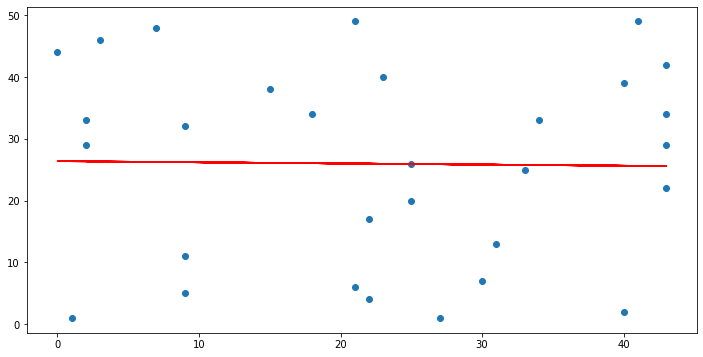

se:  0.20749822981855676
t_value: -0.0887566644706774
p_value: 0.9299071007436752
p_value(X < -0.09 or X > -0.09) > alpha. Do not reject H0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                  0.007878
Date:                Fri, 21 Oct 2022   Prob (F-statistic):              0.930
Time:                        18:34:05   Log-Likelihood:                -125.08
No. Observations:                  30   AIC:                             254.2
Df Residuals:                      28   BIC:                             257.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

"X2 = sm.add_constant(X)\nmodel = sm.OLS(Y, X2) \nresults = model.fit()\nprint('statsmodels: ', results.summary())"

In [209]:
# e.g. - 2
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

X = np.random.randint(0, 50, 30)
Y = np.random.randint(0, 50, 30)
plt.scatter(X, Y)

# H0: b1 = 0
# H1: b1 != 0
alpha = 0.05
df = len(Y) - 2

X_mean = np.mean(X)
Y_mean = np.mean(Y)
corr = np.sum((X - X_mean) * (Y - Y_mean)) / (np.sum((X - X_mean) ** 2) * np.sum((Y - Y_mean) ** 2)) ** 0.5

X_sd = np.std(X)
Y_sd = np.std(Y)

b1 = (Y_sd / X_sd) * corr
b0 = Y_mean - b1 * X_mean

print('b0:', b0, 'b1:', b1)
print(f'y = {b0:.2f} + {b1:.2f} * x')
plt.plot(X, b0 + b1 * X, color='red')
plt.show()

# how calculated SE here? Formula is correct because got the same rezult using OLS, fit
s2 = np.sum((Y - (b0 + b1 * X)) ** 2) / (df) # оценка дисперсии остатков
se = (s2 / (sum((X - X_mean) ** 2))) ** 0.5  
print('se: ', se)

t_value = b1 / se
print('t_value:', t_value)
p_value = 2 * (1 - st.t.cdf(abs(t_value), df))
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X < {t_value:.2f} or X > {t_value:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X < {t_value:.2f} or X > {t_value:.2f}) < alpha. Reject H0')

# OLS  - Ordinary Least Squares for Liner regression model      
print(sm.OLS(Y, sm.add_constant(X)).fit().summary()) 

'''X2 = sm.add_constant(X)
model = sm.OLS(Y, X2) 
results = model.fit()
print('statsmodels: ', results.summary())'''

# Проверка предположений модели ( условии применения в регресионном анализе)
# 1.существует линейная связь между переменными-предикторами и переменной-откликом
# Проверьте это предположение, сгенерировавграфик остатков , который отображает подогнанные значения в сравнении с остаточными значениями для регрессионной модели.




In [ ]:
# =================== Liner Regression. States example ===========================
# e.g. - 3

from pylab import *  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import statsmodels.formula.api as smf

data = pd.read_csv("C:\\Users\\Asus\\tutorial_env\\imp_files\\states.csv")
# data[:3]  #[['state','metro_res']] # select only 3 rows and 2 columns 

data.head()
lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()
lm.params
lm.summary()

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
#pd.DataFrame(X[0:1,:].T).describe()
#X[0:1,:]

data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]

ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')

ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=data_below_serf.hs_grad, 
                                   y=data_below_serf.metro_res, 
                                   z=data_below_serf.poverty, 
                                   mode='markers', 
                                   marker=dict(color='red', size=5))])
fig.add_trace(go.Scatter3d(x=data_above_serf.hs_grad, 
                           y=data_above_serf.metro_res, 
                           z=data_above_serf.poverty, 
                           mode='markers', 
                           marker=dict(color='blue', size=5)))
fig.add_trace(go.Surface(x=X, y=Y, z=Z,showscale=False, 
                         opacity=0.3))
fig.update_layout(scene = dict(
                    xaxis_title='hs_grad',
                    yaxis_title='metro_res',
                    zaxis_title='poverty'))
fig.show()





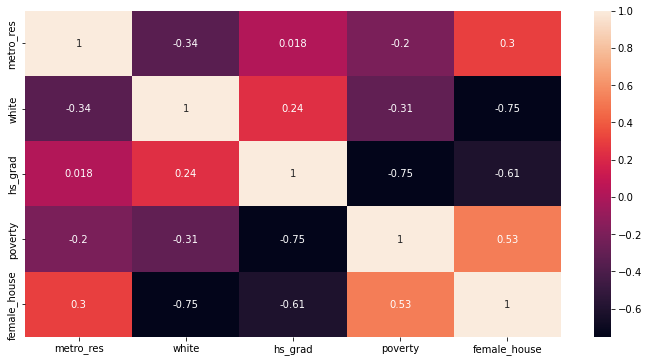

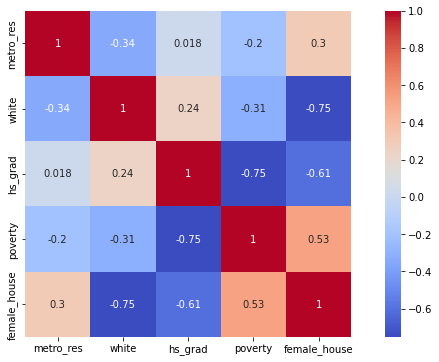

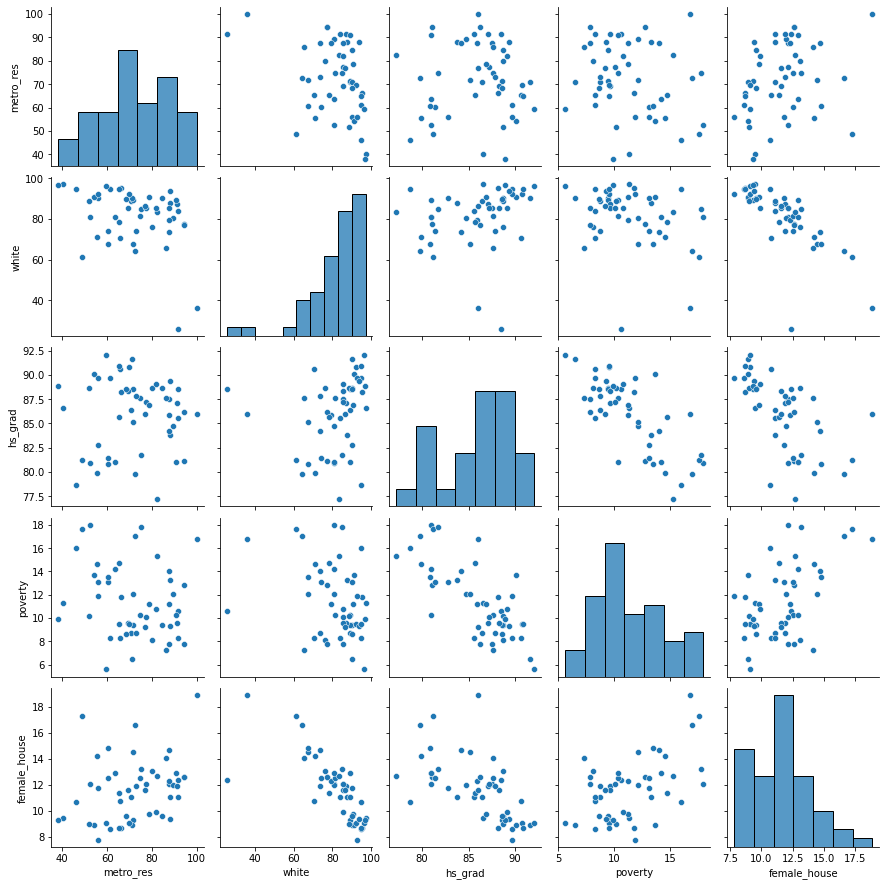

In [322]:
import seaborn as sns
# corr 1
sns.heatmap(data.corr(), annot = True)

# corr 2
features = data.columns
f,ax = plt.subplots(1,1)
sns.heatmap(data[features].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()
plt.close()

# scater plot for eatch param
sns.pairplot(data)
plt.show()

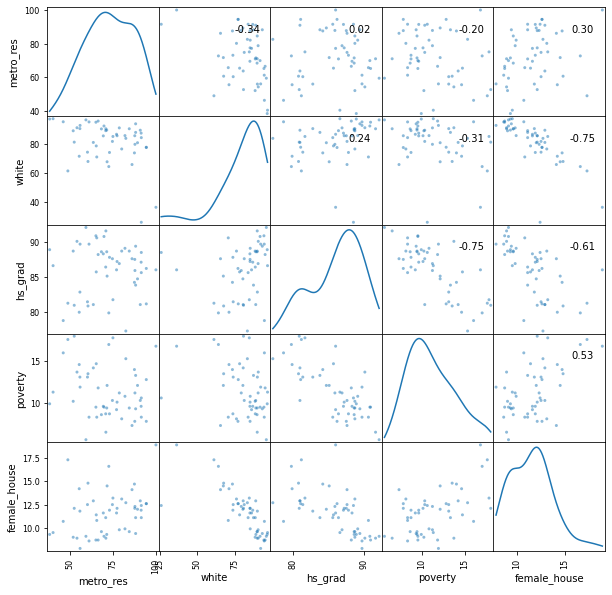

In [321]:
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [ ]:
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=df['white'], ys=df['poverty'], zs=df['hs_grad'])
plt.show()
'''

N = 100

x = np.array([np.random.randint(50,100) for i in range(N)])
y = np.array([i+np.random.randint(80,120)-np.random.randint(-20,20) for i in x])

plt.scatter(x, y)
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
plt.plot(x, b0 + b1*x, color='red')
plt.show()

In [2]:
import numpy as np
import math as ma
print(np.log(20))
print(ma.log(20))

2.995732273553991
2.995732273553991


0.6
0.2
0.2
Optimal Hyperparams: {'max_depth': 12, 'n_estimators': 25}

Mean 0.783 Standard Deviation 0.126 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.789 Standard Deviation 0.138 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.803 Standard Deviation 0.111 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.802 Standard Deviation 0.117 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.8 Standard Deviation 0.051 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.822 Standard Deviation 0.051 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.82 Standard Deviation 0.037 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.818 Standard Deviation 0.04 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.779 Standard Deviation 0.066 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.803 Standard Deviation 0.028 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.82 Standard Deviation 0.052 Hy

<Figure size 576x432 with 0 Axes>

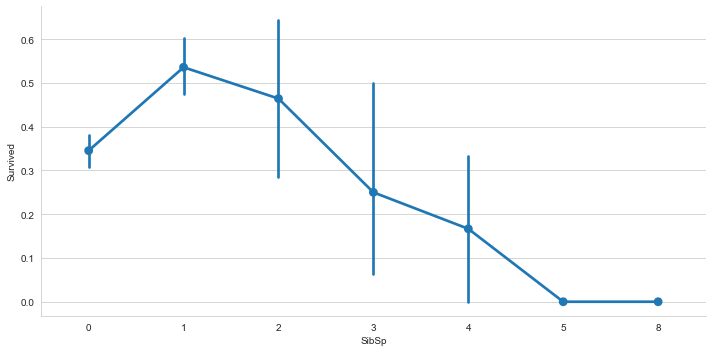

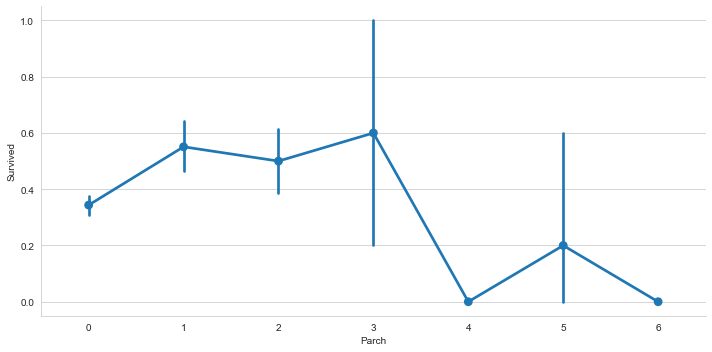

In [11]:
## ========================== Avecoder =============================
# ------------------------AVE - 0. EDA_Pipeline -  in google colab conspect ------
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Import dataset
titanic = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train.csv")
titanic.head()

# Count missing values
titanic.isnull().sum()

# Fill missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Combine SibSp & Parch
for i, col in enumerate(['SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2) 
    
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

# Save the data
titanic.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv", index=False)

# Binary Cabin Index
titanic['Cabin_index'] = np.where(titanic['Cabin'].isnull(), 0, 1)

# Sex -> Numeric
sex_numeric = {'male': 0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(sex_numeric)

# More Cleaning
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

# Save the data
titanic.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv", index=False)

# This step can be skiped , importing prepeared cleaned data from csv
titanic = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv")
titanic.head()

# Train Test Split
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

# Here order of parameters matters
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for data in [y_train, y_val, y_test]:
  print(round(len(data) / len(labels), 2))

# Save the data
X_train.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv", index=False)
X_val.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv", index=False)
X_test.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv", index=False)

y_train.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv", index=False)
y_val.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv", index=False)
y_test.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv", index=False)

## Cross Validation
train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

rf = RandomForestClassifier()
scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)
scores

## Hyperparameter Tuning
rf = RandomForestClassifier()

hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [2, 12, 24, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(train_features, train_labels.values.ravel())

def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))
    
results(cross_val)

rf1 = RandomForestClassifier(n_estimators=50, max_depth=12)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=12)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf3.fit(train_features, train_labels.values.ravel())

## Model Evaluation
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(val_features)
  accuracy = round(accuracy_score(val_labels, y_pred), 3)
  precision = round(precision_score(val_labels, y_pred), 3)
  recall = round(recall_score(val_labels, y_pred), 3)

  print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
                                                                                                rf1.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
    

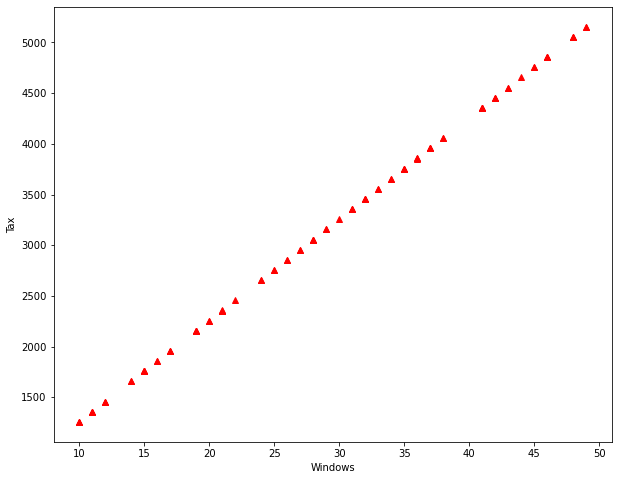

[255.49375784] [[99.9990074]]
0.9999999400098565


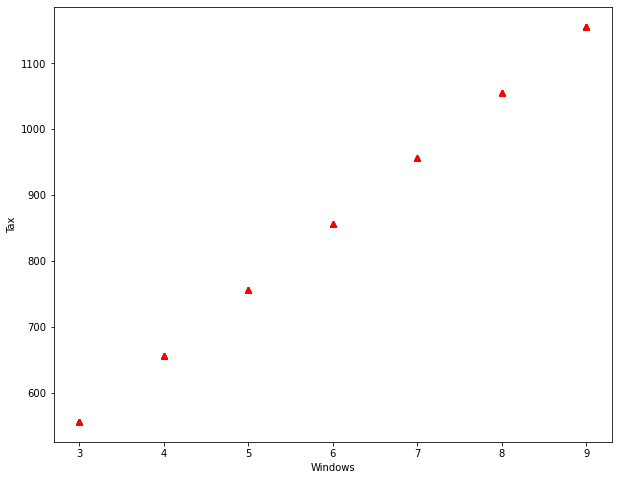

1.0


In [41]:
# ---- --------------------AVE- 1.Linear regression ----------------------
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10,8

windows = np.random.randint(10,50,(100,1))
windows

tax = 256 + 100*windows - abs(np.random.rand(100, 1))
tax[1:10]

plt.plot(windows, tax, 'r^')
plt.xlabel('Windows')
plt.ylabel('Tax')
plt.show()

X = windows
y = tax

LinReg = LinearRegression()
result = LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)     # regression coef.
print(LinReg.score(X, y))                  # score  - it's R2 determination coefficient 

X_new = np.random.randint(3,10,(100, 1))
y_new = LinReg.predict(X_new)              # predict - calc Y_new with regression coefficient for X_new
#X_new[:3]
#Y_new[:3]
plt.plot(X_new, y_new, 'r^')
plt.xlabel('Windows')
plt.ylabel('Tax')
plt.show()
print(LinReg.score(X_new, y_new))

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000
Score (R2):  0.8488812666133723
intercept:  [12707.03448276]
slope:  [[ 770.62314759 2710.00681553]]


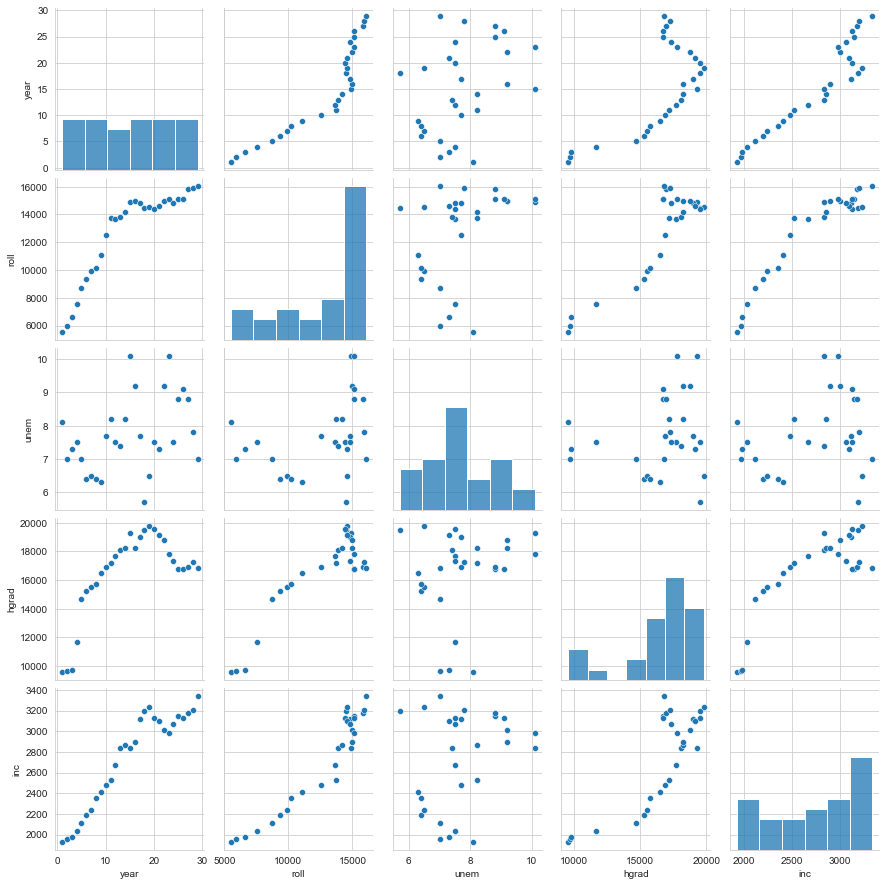

In [67]:
# ---- --------------------AVE- 2.Multiple liner regression ----------------------
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

enrollment = pd.read_csv("C:\\Users\\Asus\\Downloads\\enrollment_forecast.csv")

enrollment.head()
enrollment.columns = ['year', 'roll', 'unem', 'hgrad', 'inc'] # may skip, pandas do it automaticaly while import csv
enrollment.columns

sb.pairplot(enrollment)

print(enrollment.corr())

enrollment_data = enrollment[['unem', 'hgrad']].values  ## values - только значения, т.е. получили ndarray
enrollment_target = enrollment[['roll']].values
enrollment_data_names = ['unem', 'hgrad']

X, y = scale(enrollment_data), enrollment_target

# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 
missing_values

LinReg = LinearRegression()
LinReg.fit(X, y)
print('Score (R2): ',LinReg.score(X, y))
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)


# здесь на оси х значения 1 и 2-го независимого параметра, поэтому точек в 2 раза больше чем наблюдений 

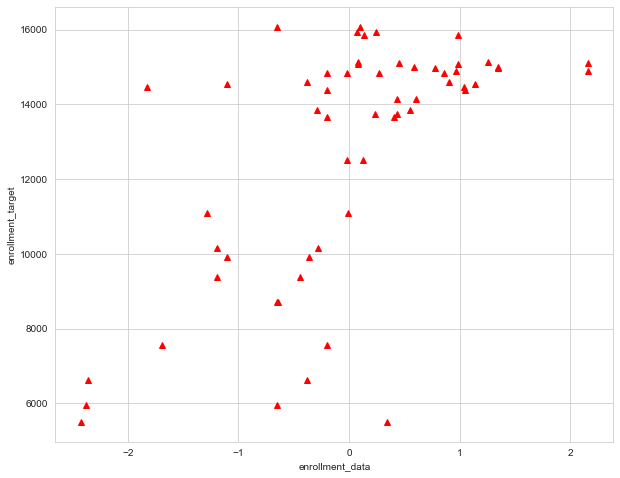

In [68]:
y_pred = LinReg.predict(X)
#print('prediction: ', y_pred, sep='\n')
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()

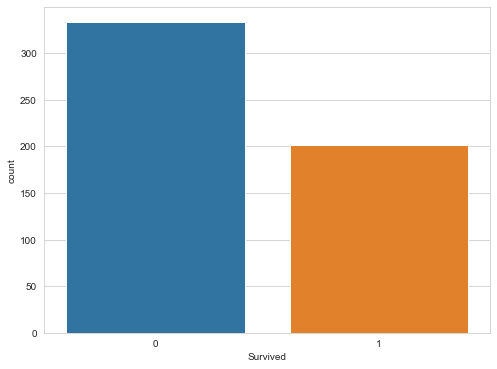

OK  59
NOT OK 119


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[96, 17],
       [23, 42]], dtype=int64)

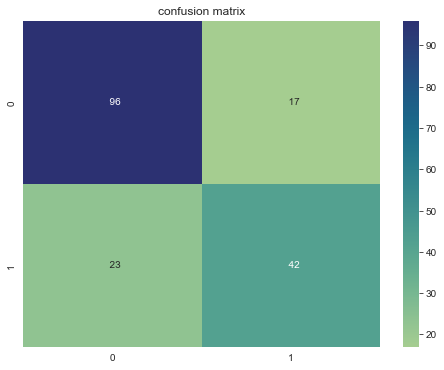

In [19]:
# ---- --------------------AVE 3. Logistic regression ----------------------
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sb
sb.set_style('whitegrid')

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

sb.countplot(x='Survived', data=train_labels)
plt.show()

log_reg = LogisticRegression()

log_reg.fit(train_features, train_labels)

log_reg.score(test_features, test_labels)  #0.7752808988764045

survival = log_reg.predict(test_features)

print("OK ", sum(survival!=0))
print("NOT OK", sum(survival==0))

## Confusion Matrix
conf_mx = confusion_matrix(test_labels, survival)

sb.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)
conf_mx

(120, 4) (30, 4) (120,) (30,)
versicolor
setosa


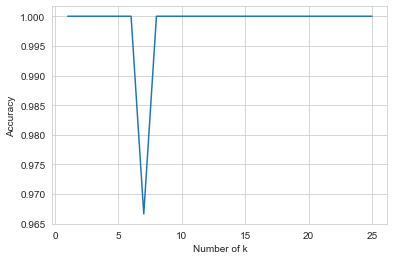

In [21]:
# ============= 4. AVE - KNN

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
type(iris)
iris.data
iris.feature_names
iris.target_names
iris.data.shape

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

scores

plt.plot(k_range, scores_list)
plt.xlabel('Number of k')
plt.ylabel('Accuracy')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

In [22]:
x_new 

[[3, 4, 5, 2], [5, 4, 2, 2]]

In [23]:
y_predict

array([1, 0])

In [24]:
from sklearn import metrics

In [2]:
import numpy as np

In [3]:
np.random.normal(size=10)

array([-2.72649133, -0.59405978, -1.00212313, -0.11518734, -0.59413843,
        0.17904835,  1.12618614,  2.31789574, -2.15641199, -0.43627576])

In [28]:
from statsmodels.formula.api import ols